# Some dual tilings

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import numpy as np
import geopandas as gpd
import pandas as pd

from shapely.geometry import Polygon
from shapely.affinity import rotate

from tile_map import Tiling
from tile_units import TileUnit

import tiling_utils

ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

## Exploring for now

<AxesSubplot:>

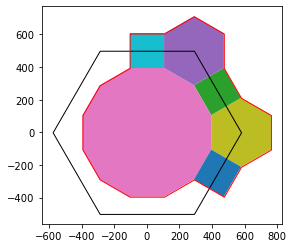

In [6]:
unit = TileUnit(tiling_type = "archimedean", code = "4.6.12", crs = ak.crs)
ax = unit.elements.plot(column = "element_id")
unit.tile.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")
unit.regularised_tile.plot(ax = ax, edgecolor = "r", facecolor = "#00000000")

In [ ]:
fig = pyplot.figure(figsize = (15, 15))
codes = ["3.4.6.4", "3.6.3.6", "4.6.12", "3.3.4.3.4"]
for code, posn in zip(codes, range(221, 225)):
    t = TileUnit(tiling_type = "laves", code = code, crs = ak.crs)
    ax = fig.add_subplot(posn)
    t.get_local_patch(r = 1, include_0 = True).plot(
        ax = ax, edgecolor = "w", facecolor = "lightgrey")
    t.tile.plot(ax = ax, alpha = 0.3)
    t.elements = tiling_utils.get_dual_tile_unit(t)
    # t.regularise_elements()
    t.elements.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")

We can drop this easily enough

In [ ]:
t.elements.drop_duplicates(["element_id"], inplace = True)
t.regularised_tile.geometry = gpd.GeoSeries(
    [t.elements.geometry.buffer(1e-3).unary_union.buffer(-1e-3)])

ax = t.get_local_patch(r = 1).plot(figsize = (10, 10),
    column = "element_id", alpha = 0.3)
t.elements.plot(ax = ax, column = "element_id")
t.tile.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")
t.regularised_tile.plot(ax = ax, edgecolor = "r", facecolor = "#00000000")

The tile is the same whether we do the rhombus version or the squares and triangles version.

In [ ]:
tiling = Tiling(t, ak, id_var = "DZ2018").get_tiled_map(prioritise_tiles = False)

fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
# ak.plot(ax = ax, facecolor = "#009966", linewidth = 0)

strands = pd.Series.unique(tiling.element_id)
cols = [x for x in tiling.columns if "Rank" in x]
cmaps = ("RdYlBu", "viridis", "PuOr", "Spectral", 
         "BrBG", "RdGy", "PiYG", "PRGn")

for strand, col, cmap in zip(strands, cols, cmaps):
    tiling[tiling.element_id == strand].plot(
        ax = ax, column = col, cmap = cmap, k = 100, 
        scheme = "equal_interval", linewidth = 0)